# Скачивание данных

In [2]:
!pip3 install jsonlines

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import jsonlines
import pandas as pd
import numpy as np

In [32]:
text = []
with jsonlines.open(r"Data/ranking_train.jsonl", 'r') as reader:
    for obj in  reader:
        text.append(obj)

In [33]:
'''Формат данных следующий... Сначала по ключу 'text' выдаёт тело поста; по ключу 'comments' получаем список, состоящий из словарей следующего вида - по ключу 'text' выдаёт 
тело комментария, а по ключу 'score' получаем оценку от 0 до 4'''
len(text) 

88107

In [7]:
print('Пример вызова тела поста: {}'.format(text[0]['text']) )

Пример вызова тела поста: How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?


In [8]:
text[0]

{'text': 'How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?',
 'comments': [{'text': 'Going back to school is not identical with giving up. Some founders go back to school and keep working on the startup while there.  However, those do so much worse than the people who work on the startup full-time that going back to school seems, in practice, not too far removed from a death sentence for a startup.Off the top of my head, I\'d guess we\'ve had about 8 startups where the founders went back to school.  It doesn\'t only happen with summer batches.  Founders from winter batches do it too.Usually the reason is that the startup isn\'t doing very well. However, that judgement depends a lot on how determined the founders are.  One reason we now shy away from funding people still in school is that they often unconsciously want the startup to fail, because the idea of dropping out frightens them.A lot of startups loo

In [9]:
print('Пример вызова тела комментариев: {}'.format(text[0]['comments']) )

Пример вызова тела комментариев: [{'text': 'Going back to school is not identical with giving up. Some founders go back to school and keep working on the startup while there.  However, those do so much worse than the people who work on the startup full-time that going back to school seems, in practice, not too far removed from a death sentence for a startup.Off the top of my head, I\'d guess we\'ve had about 8 startups where the founders went back to school.  It doesn\'t only happen with summer batches.  Founders from winter batches do it too.Usually the reason is that the startup isn\'t doing very well. However, that judgement depends a lot on how determined the founders are.  One reason we now shy away from funding people still in school is that they often unconsciously want the startup to fail, because the idea of dropping out frightens them.A lot of startups look bad after 3 months.  Someone who\'s out of school and has to make it work or get a job in a cubicle will say "don\'t wor

In [14]:
pd_data = pd.DataFrame(columns = ['post', 'comment', 'score'])
i=0
batch_size = 32
def bach_generator(batch_size, text):
    i=0
    batch_idx = np.random.random_integers(0, len(text), batch_size)
    
    data = np.array(text)[[batch_idx]][0]
    
    for body in data:
        for comment in body['comments']:
            pd_data.loc[i] = [body['text'].lower(), comment['text'].lower(), comment['score']]
            i+=1
    return pd_data

    

In [15]:
bach_generator(batch_size, text)

C:\Users\User\AppData\Local\Temp\ipykernel_18212\1099541067.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 88107 + 1) instead
  batch_idx = np.random.random_integers(0, len(text), batch_size)


,post,comment,score
0,libv8 + libfastcgi = server-side javascript,w00t serverside javascript again. i remember ...,0
1,libv8 + libfastcgi = server-side javascript,aptana jaxer (http://www.aptana.com/jaxer) is ...,1
2,libv8 + libfastcgi = server-side javascript,i've been doing that with rhino and jetty for ...,2
3,libv8 + libfastcgi = server-side javascript,server side javascript isn't completely new id...,3
4,libv8 + libfastcgi = server-side javascript,since someone is going to say this sooner or l...,4
...,...,...,...
155,what do conductors do?,(i was expecting an article about electricity....,0
156,what do conductors do?,"i played in orchestras from 6 to about 23, fro...",1
157,what do conductors do?,you can think of the orchestra as a meta-instr...,2
158,what do conductors do?,"well, in a metal, it has to do with free elect...",3


In [251]:
'''Перегонка датафрейма в CSV. Этот файл уже висит в репо'''
# pd_data.to_csv (r'my_data.csv', index= False )

'Перегонка датафрейма в CSV. Этот файл уже висит в репо'

# Preprocessing

In [13]:
!pip3 install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 KB 7.1 MB/s eta 0:00:004.9 MB/s eta 0:00:01


In [4]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from functools import reduce

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [131]:
stop_w =stopwords.words("english")
ps = PorterStemmer()
pd_data_sent = pd.DataFrame(columns = ['post', 'comment', 'score'])
dictionary = []
i=0
batch_size = 200

def batch_generator(batch_size, text):
    i=0
    batch_idx = np.random.random_integers(0, len(text), batch_size)
    
    data = np.array(text)[[batch_idx]][0]
    
    for body in data:
        for comment in body['comments']:
            post_text = body['text'].translate(str.maketrans("", "", string.punctuation))
            post_tokens = word_tokenize(post_text)
            
            comment_text = comment['text'].translate(str.maketrans("", "", string.punctuation))
            comment_tokens = word_tokenize(comment_text)
            
            
            stemmed_post = [ps.stem(x) if x not in stop_w else '' for x in post_tokens ]
            stemmed_coment = [ps.stem(x) if x not in stop_w else '' for x in comment_tokens ]
            
            pd_data_sent.loc[i] = [' '.join(stemmed_post), ' '.join(stemmed_coment), comment['score']]
            i+=1
            
    return pd_data_sent

batch_data = batch_generator(batch_size, text)
batch_data.shape

C:\Users\User\AppData\Local\Temp\ipykernel_18212\3838342741.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 88107 + 1) instead
  batch_idx = np.random.random_integers(0, len(text), batch_size)


(1000, 3)

In [132]:
train_target = batch_data['score']
train_data =batch_data['post']+batch_data['comment']

In [133]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(train_data).toarray()
labels = train_target

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=10),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    KNeighborsClassifier()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

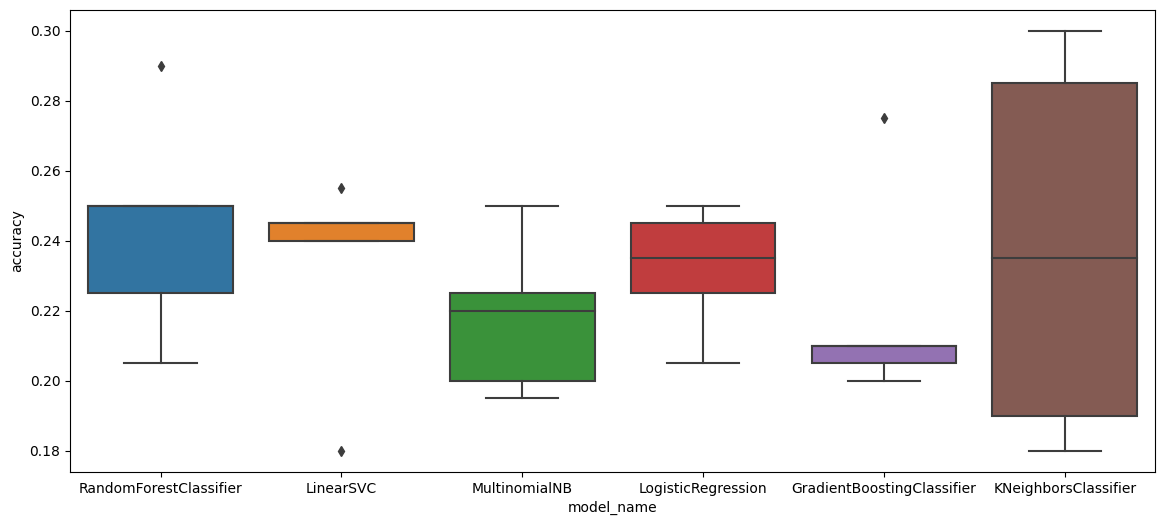

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
plt.show()